## Info about dataframe:
### Columns:
- BreedID <br>
- sex <br>
- fixed <br>
- color <br>
- strangeraggr (stranger-directed aggression) <i><-- negatively-viewed trait <br>
- owneraggr (owner-directed aggression) <i><-- negatively-viewed trait <br>
- dogaggr (dog-directed aggression) <i><-- negatively-viewed trait<br>
- dogfear (dog-directed fear) <i><-- negatively-viewed trait<br>
- dogrivalry <i><-- negatively-viewed trait<br>
- trainability <br>
- chasing <br>
- strangerfear (stranger-directed fear) <i><-- negatively-viewed trait<br>
- nonsocialfear <i><-- negatively-viewed trait<br>
- sepprobs (separation-related behavior problems) <i><-- negatively-viewed trait<br>
- touchsens (touch sensitivity)<br>
- excitability <br>
- attachatten (attachment and attention-seeking behavior) <br>
- energy

In [1]:
# import relevant modules

import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataframe

full = pd.read_csv('cleaned_cbarq.csv')
full.head()

,Unnamed: 0,BreedID,sex,fixed,color,strangeraggr,owneraggr,dogaggr,dogfear,dogrivalry,trainability,chasing,strangerfear,nonsocialfear,sepprobs,touchsens,excitability,attachatten,energy
0,0,Mixed Breed/Unknown,M,False,brown,0.0,0.0,0.00,0.0,0.00,3.125,2.25,1.0,1.000000,0.000,0.50,0.666667,0.666667,2.0
1,1,American Staffordshire Terrier,M,False,tan,0.0,0.0,0.00,0.0,0.00,1.625,0.00,0.0,0.000000,0.750,0.00,3.333333,1.500000,1.0
2,2,Bernese Mountain Dog,F,True,white,0.2,0.0,0.25,0.0,0.25,2.125,0.50,0.0,0.166667,0.375,0.00,2.000000,3.166667,4.0
3,3,Sussex Spaniel,M,False,gray,0.1,0.0,0.00,1.0,0.75,2.625,2.75,0.0,0.000000,1.500,0.75,3.333333,3.000000,3.5
4,4,Mixed Breed/Unknown,F,False,white,0.3,0.0,0.50,0.0,0.00,2.750,2.00,2.0,2.000000,0.000,0.25,1.833333,2.000000,1.0


In [3]:
# how many breeds have a significant number of observations?

counts = full['BreedID'].value_counts()

# limit dataframe to the 10 breeds with the most observations

rem = full[~full['BreedID'].isin(counts[counts < 220].index)]

# fix unnecessary columns

top = rem.reset_index()
top = top.drop(['index', 'Unnamed: 0'], axis=1)

top.head(10)

,BreedID,sex,fixed,color,strangeraggr,owneraggr,dogaggr,dogfear,dogrivalry,trainability,chasing,strangerfear,nonsocialfear,sepprobs,touchsens,excitability,attachatten,energy
0,Mixed Breed/Unknown,M,False,brown,0.000000,0.000,0.000000,0.00,0.000000,3.125000,2.25,1.00,1.000000,0.000,0.500000,0.666667,0.666667,2.0
1,Mixed Breed/Unknown,F,False,white,0.300000,0.000,0.500000,0.00,0.000000,2.750000,2.00,2.00,2.000000,0.000,0.250000,1.833333,2.000000,1.0
2,Labrador Retriever,F,False,black,0.400000,0.000,0.250000,0.25,0.000000,3.285714,3.25,0.00,0.833333,0.000,0.250000,2.833333,2.666667,2.0
3,Mixed Breed/Unknown,M,False,fawn,2.100000,0.375,2.000000,2.00,2.000000,2.250000,1.75,2.00,2.000000,1.875,1.500000,2.333333,1.833333,1.5
4,Border Collie,M,True,brindle,0.111111,0.000,0.500000,0.25,0.000000,3.500000,1.75,0.00,0.200000,0.000,0.333333,2.000000,1.166667,1.5
5,Australian Shepherd,F,True,gray,0.900000,0.000,3.250000,0.00,1.750000,1.875000,2.50,0.00,1.833333,0.750,2.500000,2.333333,2.000000,3.5
6,German Shepherd,M,False,yellow,0.200000,0.000,0.250000,0.25,0.560534,3.625000,1.00,0.25,0.000000,0.125,0.000000,1.166667,1.666667,1.5
7,Golden Retriever,F,True,black,0.100000,0.000,2.000000,0.25,1.250000,2.625000,3.25,0.00,0.000000,0.000,0.250000,1.666667,2.166667,1.0
8,German Shepherd,F,True,fawn,0.300000,0.000,0.250000,0.00,0.250000,2.375000,0.00,0.00,0.400000,0.500,0.666667,1.500000,1.500000,2.0
9,Doberman Pinscher,F,True,white,0.600000,0.000,0.666667,0.25,0.750000,3.000000,0.75,0.00,0.333333,0.125,0.000000,1.833333,2.166667,3.0


In [4]:
# descriptive statistics

top.describe(include='all')

,BreedID,sex,fixed,color,strangeraggr,owneraggr,dogaggr,dogfear,dogrivalry,trainability,chasing,strangerfear,nonsocialfear,sepprobs,touchsens,excitability,attachatten,energy
count,5629,5629,5629,5629,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000
unique,10,2,2,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mixed Breed/Unknown,M,True,gray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2225,2916,2913,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.628214,0.071623,0.976395,0.704568,0.506143,2.742782,2.098624,0.566842,0.777868,0.485219,0.643038,2.106488,1.973092,2.016348
std,NaN,NaN,NaN,NaN,0.655315,0.130109,0.953054,0.801260,0.590273,0.595843,1.046470,0.836124,0.732970,0.559539,0.700782,0.800616,0.789705,1.051533
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.100000,0.000000,0.250000,0.000000,0.000000,2.375000,1.500000,0.000000,0.166667,0.000000,0.000000,1.500000,1.500000,1.500000
50%,NaN,NaN,NaN,NaN,0.400000,0.000000,0.750000,0.500000,0.500000,2.750000,2.131099,0.000000,0.666667,0.250000,0.500000,2.000000,2.000000,2.000000
75%,NaN,NaN,NaN,NaN,0.900000,0.125000,1.500000,1.000000,0.666667,3.125000,3.000000,1.000000,1.166667,0.750000,1.000000,2.666667,2.500000,3.000000


In [5]:
# add '1' to all values of each continuous column to better reflect the original survey's 1-5 scale

continuous = top.select_dtypes(include=[float, int])
cont = continuous.columns
for col in cont:
    top[col] = top[col] + 1

top.head()

,BreedID,sex,fixed,color,strangeraggr,owneraggr,dogaggr,dogfear,dogrivalry,trainability,chasing,strangerfear,nonsocialfear,sepprobs,touchsens,excitability,attachatten,energy
0,Mixed Breed/Unknown,M,False,brown,1.000000,1.000,1.00,1.00,1.0,4.125000,3.25,2.0,2.000000,1.000,1.500000,1.666667,1.666667,3.0
1,Mixed Breed/Unknown,F,False,white,1.300000,1.000,1.50,1.00,1.0,3.750000,3.00,3.0,3.000000,1.000,1.250000,2.833333,3.000000,2.0
2,Labrador Retriever,F,False,black,1.400000,1.000,1.25,1.25,1.0,4.285714,4.25,1.0,1.833333,1.000,1.250000,3.833333,3.666667,3.0
3,Mixed Breed/Unknown,M,False,fawn,3.100000,1.375,3.00,3.00,3.0,3.250000,2.75,3.0,3.000000,2.875,2.500000,3.333333,2.833333,2.5
4,Border Collie,M,True,brindle,1.111111,1.000,1.50,1.25,1.0,4.500000,2.75,1.0,1.200000,1.000,1.333333,3.000000,2.166667,2.5


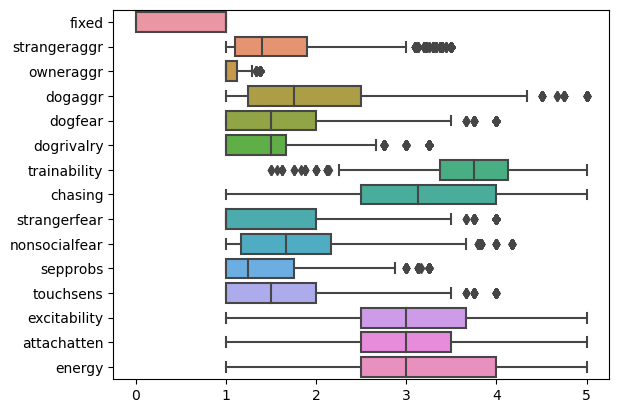

In [6]:
# examine distribution of values across quantitative columns

sns.boxplot(data=top, orient='h')
plt.show()

In [7]:
# separate traits by association to visualize the difference in values between positively- and negatively-associated quantitative traits

negatives = ['strangeraggr', 'owneraggr', 'dogaggr', 'dogfear', 'dogrivalry', 'strangerfear', 'nonsocialfear', 'sepprobs']
neg = top[negatives]
other = ['trainability', 'chasing', 'touchsens', 'excitability', 'attachatten', 'energy']
oth = top[other]

Text(0.5, 1.0, 'Positive or neutral traits')

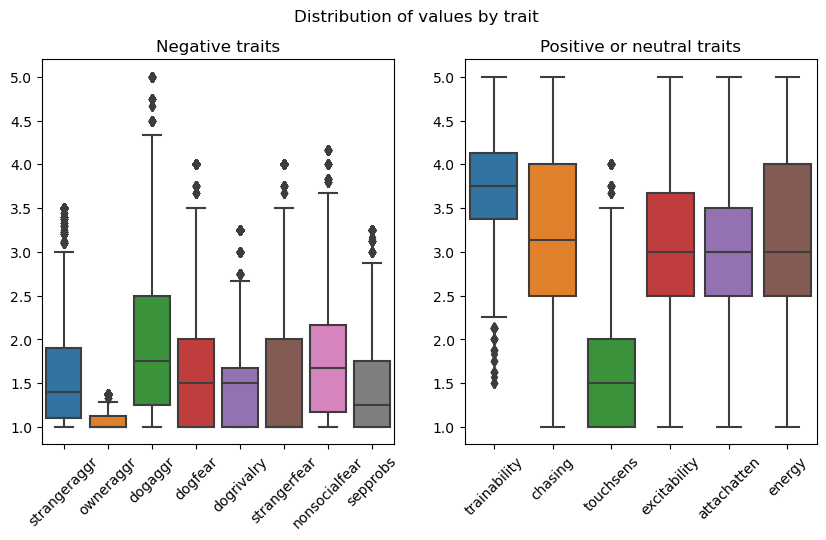

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Distribution of values by trait')
ax[0] = sns.boxplot(ax = ax[0], data = neg)
ax[0].tick_params(axis = 'x', labelrotation = 45)
ax[0].set_title('Negative traits')
ax[1] = sns.boxplot(ax = ax[1], data = oth)
ax[1].tick_params(axis = 'x', labelrotation = 45)
ax[1].set_title('Positive or neutral traits')

In [9]:
# don't forget the categorical variables
# energy, fixed, sex

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


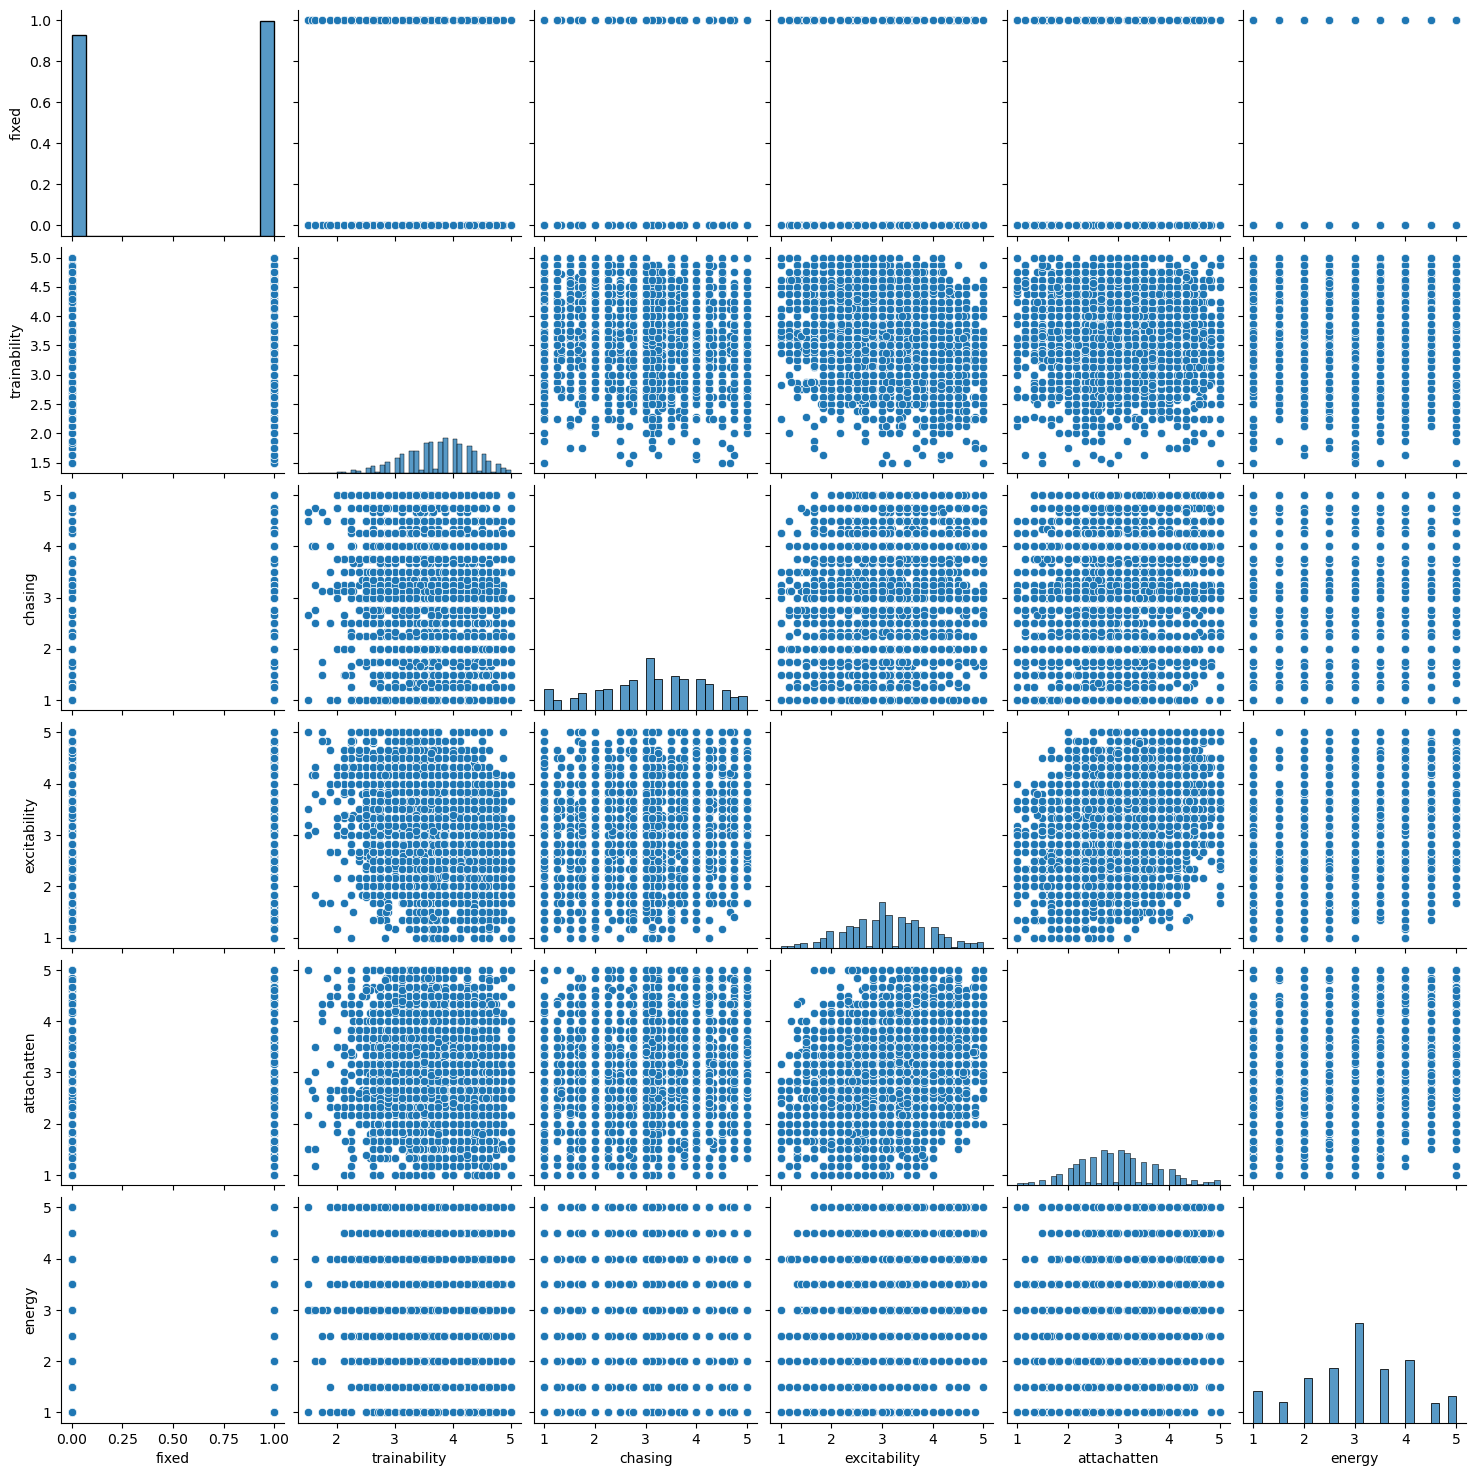

In [10]:
# cutting out the categories which seem too biased to be useful

top = top[['BreedID', 'sex', 'fixed', 'trainability', 'chasing', 'excitability', 'attachatten', 'energy']]

# visualizing relationships with a pairplot

sns.pairplot(top)

There do seem to be some relationships between variables here. First, due to the nature of the 'fixed' column (added into the dataset to provide a boolean variable), it has a uniform distribution. There seems to be some correlation between trainability, excitability, and attachatten, while the energy variable seems to be, for the most part, scattered. 

C:\Users\Guest1\AppData\Local\Temp\ipykernel_29024\2615365183.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(top.corr(), annot=True)


<AxesSubplot: >

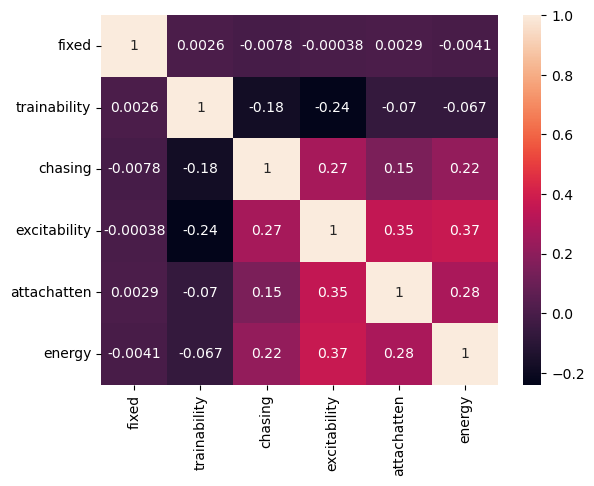

In [11]:
# using a heatmap plot to visualize these correlations further

sns.heatmap(top.corr(), annot=True)

As suspected, fixed has no correlations with any other variable. However, trainability seems to have negative correlations with chasing and excitability (which makes sense to me--it can be difficult to train a dog who is too wound up to pay attention!). The strongest overall correlation is positive, between energy and excitability, with attachatten similarly related. 

In [12]:
# since 'fixed' and 'sex' (also an artifically inserted uniform variable) are uncorrelated variables, I will omit them from the dataset for now

df = top[['BreedID', 'trainability', 'chasing', 'excitability', 'attachatten', 'energy']]

In [13]:
# calculate some aggregated functions per breed

means = df.groupby('BreedID').mean().reset_index()
meds = df.groupby('BreedID').median().reset_index()
stds = df.groupby('BreedID').std().reset_index()
summ = df.groupby('BreedID').agg(['mean', 'median', 'std']).reset_index()

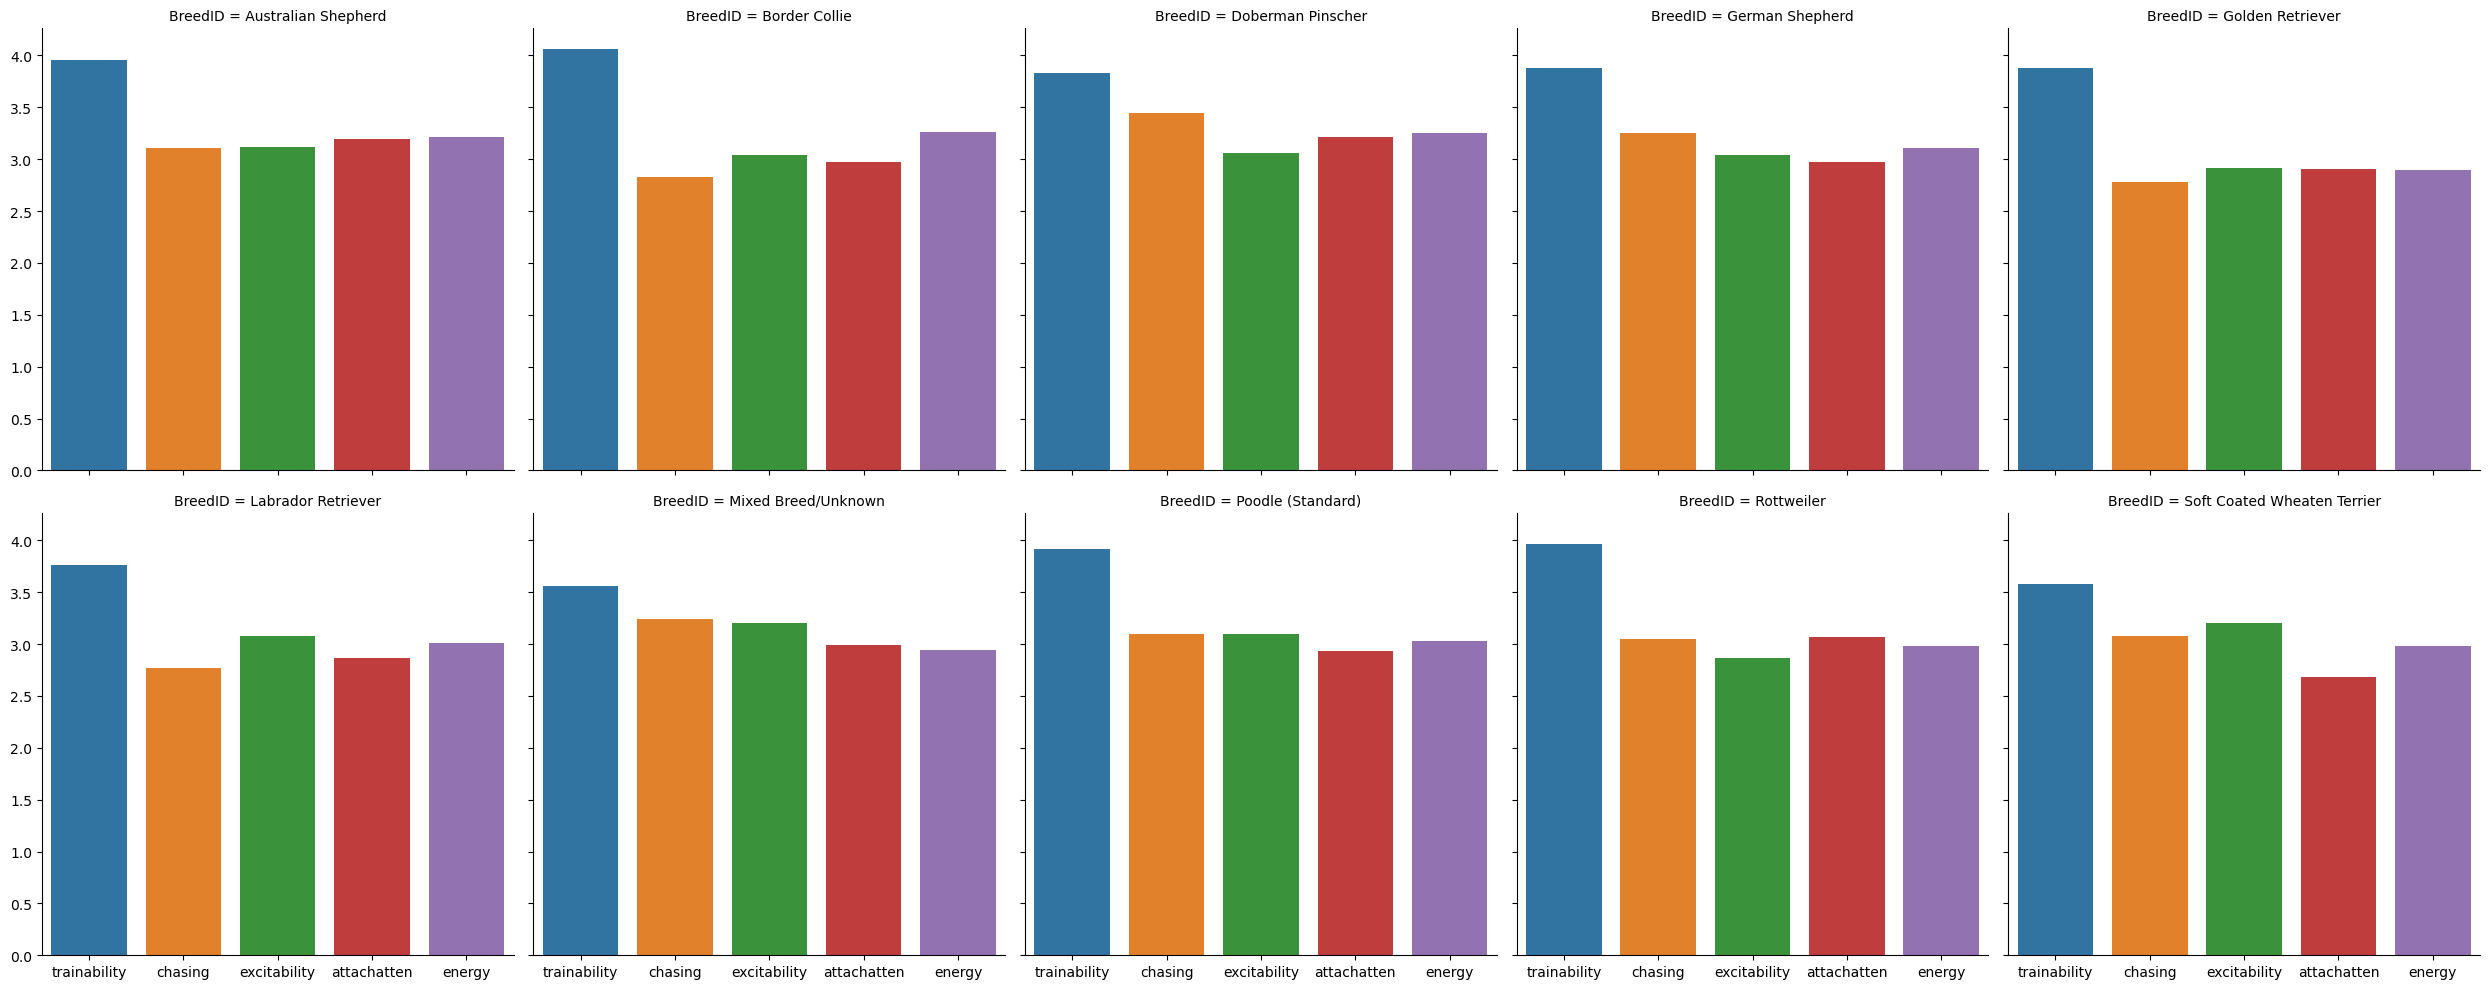

In [14]:
sns.catplot(kind='bar', data=means, col = 'BreedID', col_wrap=5, legend = 'auto', sharey = True)

The plot of means by breed is not very telling. Overall, the traits look roughly the same per breed. Trainability is notably higher than its fellows, always between 3.5 and 4 (or above 4, in one case). This corresponds with there being some bias towards higher trainability. The rest of the values range typically from 2.5 to 3.5. None of the charts look especially different, but we will test that later.

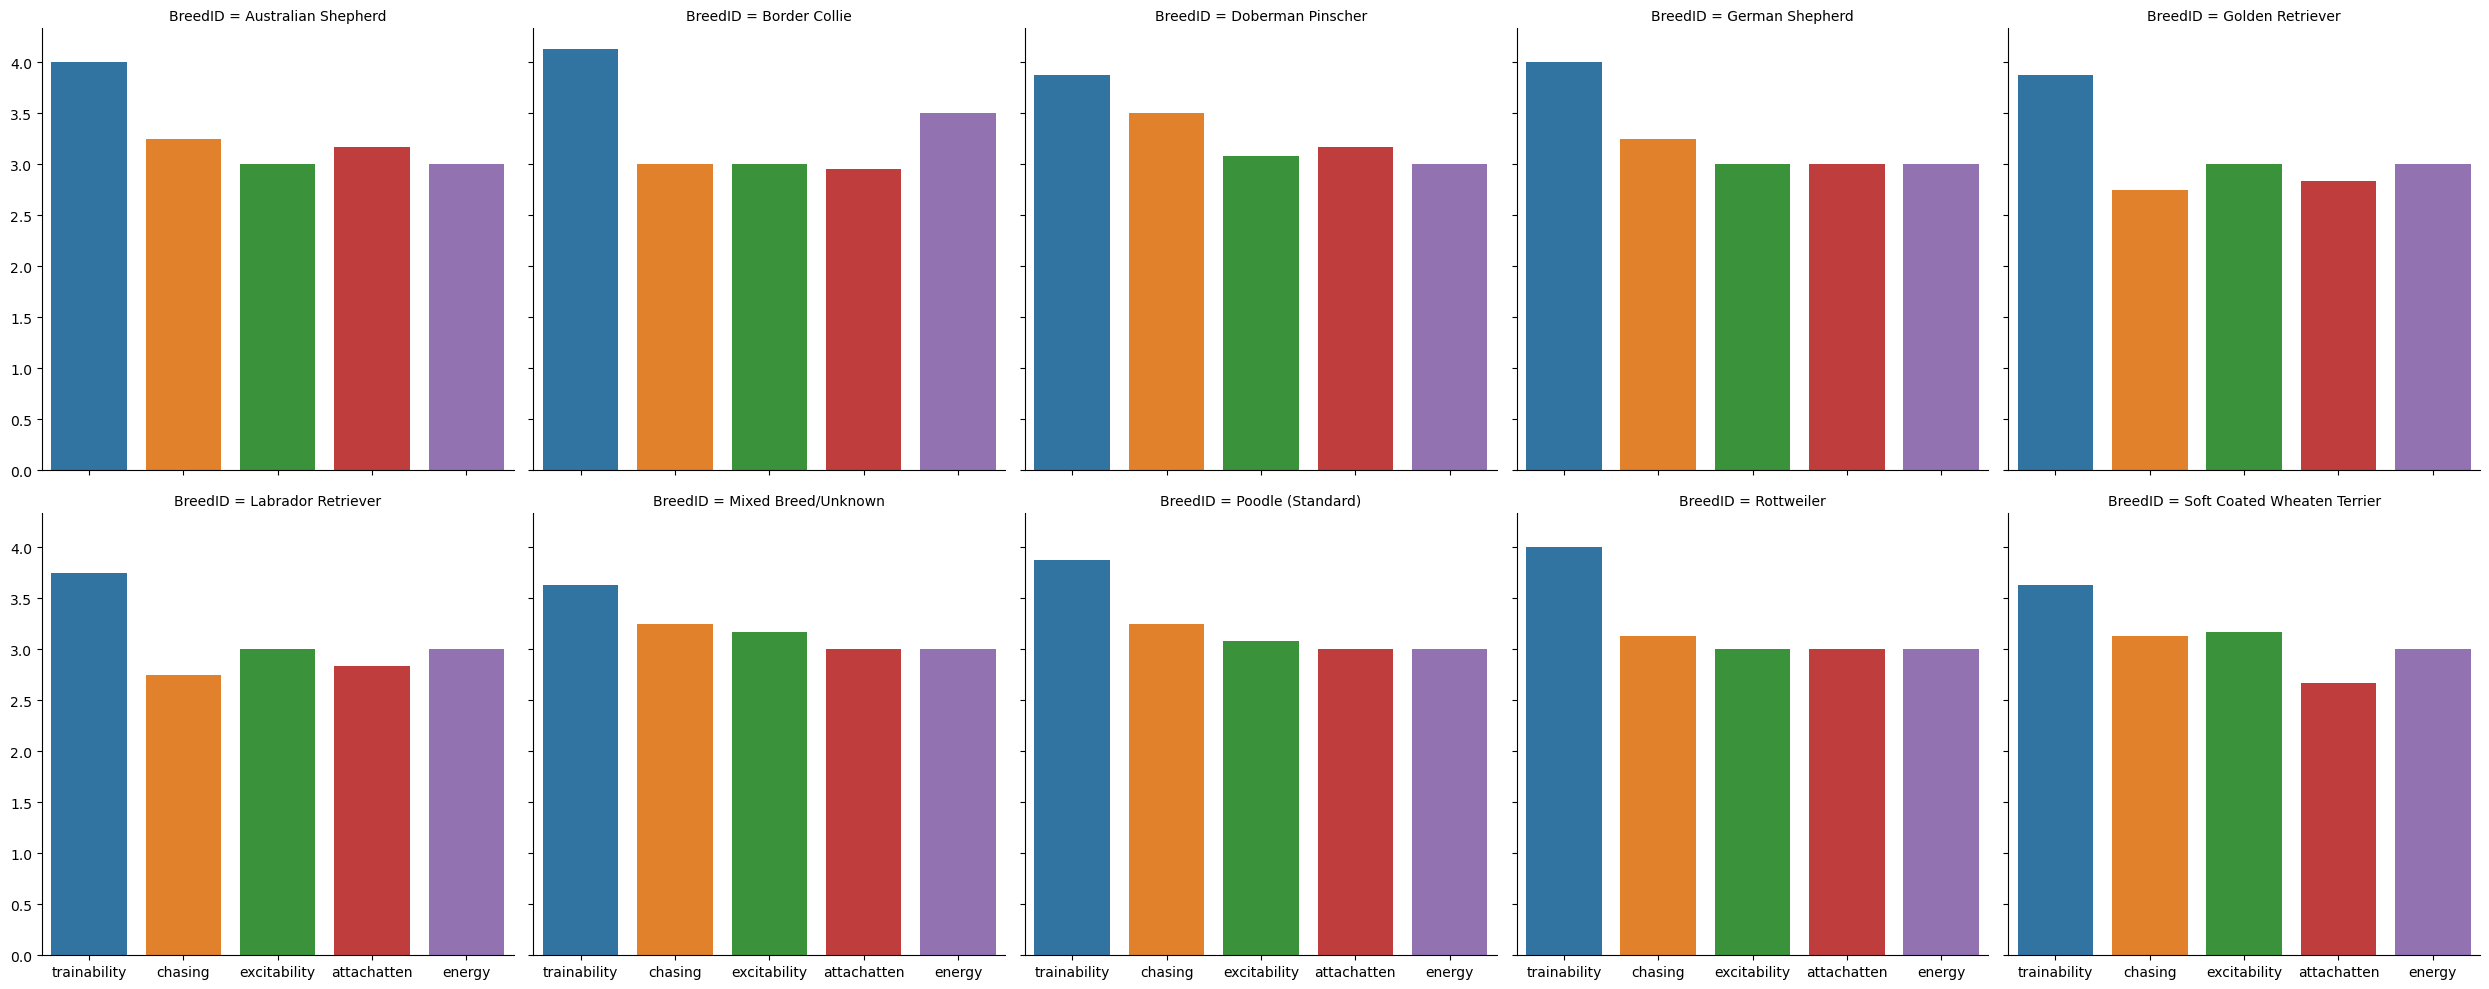

In [15]:
sns.catplot(kind='bar', data=meds, col = 'BreedID', col_wrap=5, legend = 'auto', sharey = True)

The plot of medians looks quite similar to the plot of means, with trainability taking the lead and the other values looking fairly even.

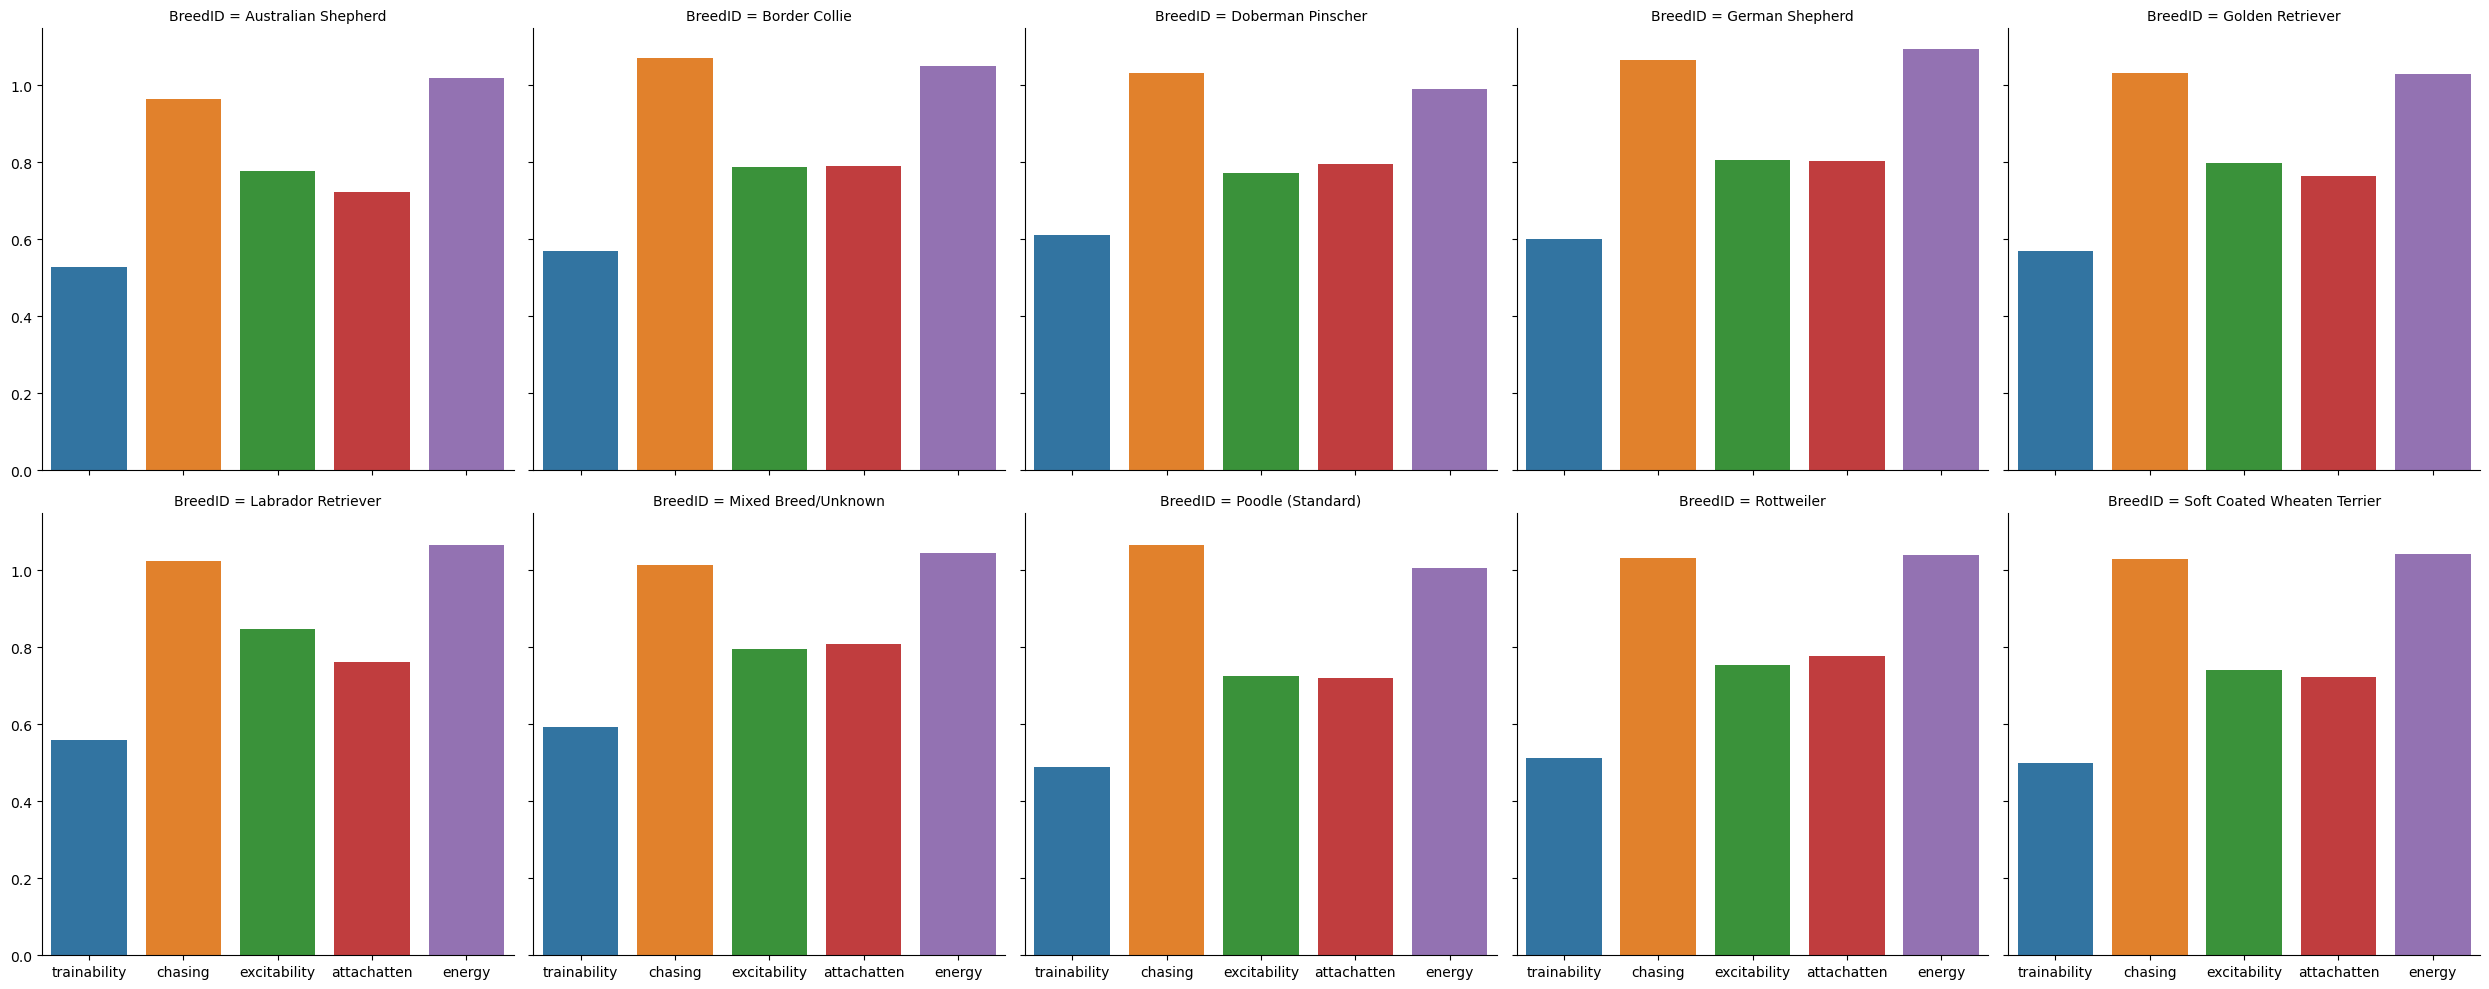

In [16]:
sns.catplot(kind='bar', data=stds, col = 'BreedID', col_wrap=5, legend='auto', sharey = True)

The plot of standard deviations is interesting, because it shows some traits with significantly larger deviations and some (trainability in particular) with very little deviation. However, overall, there again doesn't seem to be much difference by breed.

To quantitatively examine whether there are actual statistically significant differences by breed, we will perform an ANOVA test.

Well, a p value of functionally 0 is promising; at least one of these groups does have a statistically significant difference, which makes this an easier dataframe to model! For curiosity's sake, 

In [17]:
# Divide the dataset by breed

mix = df[['trainability','chasing', 'excitability', 'attachatten', 'energy']][df['BreedID'] == 'Mixed Breed/Unknown']
lab = df[['trainability', 'chasing', 'excitability', 'attachatten', 'energy']][df['BreedID'] == 'Labrador Retriever']
bcol = df[['trainability', 'chasing', 'excitability', 'attachatten', 'energy']][df['BreedID'] == 'Border Collie']
aussie = df[['trainability', 'chasing', 'excitability', 'attachatten', 'energy']][df['BreedID'] == 'Australian Shepherd']
gsd = df[['trainability', 'chasing', 'excitability', 'attachatten', 'energy']][df['BreedID'] == 'German Shepherd']
gold = df[['trainability', 'chasing', 'excitability', 'attachatten', 'energy']][df['BreedID'] == 'Golden Retriever']
dobie = df[['trainability', 'chasing', 'excitability', 'attachatten', 'energy']][df['BreedID'] == 'Doberman Pinscher']
poodle = df[['trainability', 'chasing', 'excitability', 'attachatten', 'energy']][df['BreedID'] == 'Poodle (Standard)']
rottie = df[['trainability', 'chasing', 'excitability', 'attachatten', 'energy']][df['BreedID'] == 'Rottweiler']
terr = df[['trainability', 'chasing', 'excitability', 'attachatten', 'energy']][df['BreedID'] == 'Soft Coated Wheaten Terrier']

In [18]:
# Use scipy.stats to conduct an ANOVA test on these groups

f, p = stats.f_oneway(mix, lab, bcol, aussie, gsd, gold, dobie, poodle, rottie, terr)

In [19]:
p

array([2.79230972e-100, 1.24067542e-042, 8.95360550e-018, 5.57490138e-019,
       5.13445541e-010])

From the graphs and test above, chasing and trainability seem to be the most variable between breeds. While trainability is interesting, the high values and comparatively very low standard deviation of trainability looks to me like it is plagued by heavy bias, so I will stick with chasing, which seems slightly more objective and still has a very low p score. (Chasing is also a behavior intentionally bred into certain breeds, so I suspected it may show some stronger relationships.) A p value of functionally 0 is promising; at least one of these groups does have a statistically significant difference in each trait, which makes this a more interesting dataframe to model!

#### Conclusion:

To more efficiently and simply examine and model this dataset, I narrowed down the breeds evaluated to the 10 most popular, which left our dataset still with over 2000 observations. I evaluated correlations between categories, and the strongest of those hailed from energy, excitability, chasing, attachment/attention-seeking behavior, and trainability. From here, I eliminated categories that corresponded to the "negative" traits which were strongly biased against, leaving the five strongest contenders. Statistical analysis of these yielded some initially discouraging charts which show the numerical difference between breeds is not incredibly large. However, upon doing an ANOVA analysis, the p-values revealed that there are indeed statistical differences. Due to the high values and abnormally low standard deviation of the "trainability" column (my initial choice), I decided it, too, seemed too biased to be used effectively. Of the remaining categories, I chose chasing: personal knowledge tells me that herding (and therefore chasing) is a trait strongly bred into certain dogs, it is a fairly neutral trait that most owners would be open to reporting, and therefore I felt it had the best chance of getting results nearest the truth. The p-value for this trait was 1.2406e-42, which I also found encouraging for this choice. 